<a href="https://colab.research.google.com/github/DanTheStrongworded/Analytics-Projects/blob/main/NordicNest_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**NordicNest project**

NordicNest is a yet-to-be-born company dealing with saling furniture. As the business has no gathered data on the situation with furniture market, this analysis aims to excavate insights on the example of one furniture store which NordicNest can take advantage as trampline in its initial strategy.

##**Contents**:

- Preparation: Importing and Cleaning Data;

- General Analysis (relations of popularity and profitability by sub-categories, ship modes, segments, and distribution of discounts);

- Shipping Time (dependancies between average shipping time and sub-categories, ship mode, profit, and how often sub-categories were ordered across time);

- Finding out what negative values in Profit column correlate with (correlations with the Sub-Category, Sales, Discounts, Cities, Ship Mode, Shipping Time, Segment, and Quantity values);

- Conclusions;

- Annex (Tableau visualization + Guide).

##**Preparation: Importing and Cleaning Data**

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount("/content/drive")
%cd /content/drive/MyDrive/Mate_homework
furniture_data = pd.read_csv("Super_Store_data.csv", encoding='latin', header=0, parse_dates=True)
furniture_data.head()

Mounted at /content/drive
/content/drive/MyDrive/Mate_homework


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [ ]:
furniture_data["Profit"].min()

-1862.3124

In [ ]:
furniture_data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [ ]:
missing_values = furniture_data.isna().sum()/furniture_data.shape[0]
print(f"Missing values in the dataset: \n{missing_values}")

Missing values in the dataset: 
Row ID           0.0
Order ID         0.0
Order Date       0.0
Ship Date        0.0
Ship Mode        0.0
Customer ID      0.0
Customer Name    0.0
Segment          0.0
Country          0.0
City             0.0
State            0.0
Postal Code      0.0
Region           0.0
Product ID       0.0
Category         0.0
Sub-Category     0.0
Product Name     0.0
Sales            0.0
Quantity         0.0
Discount         0.0
Profit           0.0
dtype: float64


In [ ]:
duplicated_percentage = furniture_data.duplicated().sum()/furniture_data.shape[0]
print(f"{duplicated_percentage}% is duplicated data")

0.0% is duplicated data


In [ ]:
from scipy import stats
z_scores = stats.zscore(furniture_data["Sales"])
outliers_sales = [furniture_data["Sales"][i] for i in range(len(furniture_data)) if abs(z_scores[i]) > 3]
print(f"Ouliers in Sales: {outliers_sales}")

Ouliers in Sales: [3083.43, 1951.84, 2001.86, 2396.2656, 2065.32, 2244.48, 3610.848, 2453.43, 1931.04, 2807.84, 2665.62, 2054.272, 2430.08, 2003.52, 2404.704, 3504.9, 2275.5, 2314.116, 2348.82, 4228.704, 2003.92, 2888.127, 2254.41, 4007.84, 2887.056, 2003.92, 1913.4, 2567.84, 4416.174, 2573.82, 2036.86, 2803.92, 2563.056, 2154.9, 2678.94, 2676.672, 1875.258, 2621.322, 2803.92, 3785.292, 4297.644, 3406.664, 4404.9, 3393.68, 1925.88]


In [ ]:
z_scores = stats.zscore(furniture_data["Profit"])
outliers_profit = [furniture_data["Profit"][i] for i in range(len(furniture_data)) if abs(z_scores[i]) > 3]
print(f"Ouliers in Profit: {outliers_profit}")

Ouliers in Profit: [-1665.0522, -407.682, 585.552, 580.5394, -814.4832, -619.596, 493.7856, -786.744, -430.617, -566.5625, 673.8816, -465.568, -447.5947, -553.6476, 427.4368, -427.45, -525.6405, 423.0085, -448.896, 481.47, 523.7052, -437.5404, -653.2834, 700.98, -1002.7836, 609.7157, 422.51, 629.01, -734.5264, 770.352, -630.882, -420.0, 746.4078, -464.697, -480.2032, -458.1468, -538.446, -968.8833, 553.3902, 420.588, -1862.3124, 1013.127, 610.8624, 539.2464]


In [ ]:
z_scores = stats.zscore(furniture_data["Quantity"])
outliers_quantity = [furniture_data["Quantity"][i] for i in range(len(furniture_data)) if abs(z_scores[i]) > 3]
print(f"Ouliers in Quantity: {outliers_quantity}")

Ouliers in Quantity: [14, 13, 11, 12, 13, 14, 12, 14, 13, 11, 12, 11, 11, 11, 11, 14, 11, 14, 12, 14, 12, 14, 12, 11, 14, 13, 13]


##**General Analysis**

(*Without considering negative values*)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [ ]:
#Excluding data with negative values
non_negative_profit = furniture_data[furniture_data["Profit"] >= 0]

#Counting number of orders
order_number_with = non_negative_profit["Sales"].value_counts().sum()
print(f"Number of orders(with losses): {order_number_with}")
order_number_without = furniture_data["Sales"].value_counts().sum()
print(f"Number of orders(without losses): {order_number_without}")

#Calculating profit with and without losses
profit = non_negative_profit["Profit"].sum().round(2)
print(f"General Profit (without losses): ${profit}")
profit_losses = furniture_data["Profit"].sum().round(2)
print(f"General Profit (with losses): ${profit_losses}")

#Calculating average time of shipping
furniture_data["Order Date"] = pd.to_datetime(furniture_data["Order Date"])
furniture_data["Ship Date"] = pd.to_datetime(furniture_data["Ship Date"])
shipping_time = (furniture_data["Ship Date"] - furniture_data["Order Date"]).dt.days
average_shipping_time = shipping_time.mean()
print(f"Average time of shipping: {average_shipping_time:.2f} days")

Number of orders(with losses): 1407
Number of orders(without losses): 2121
General Profit (without losses): $79387.38
General Profit (with losses): $18451.27
Average time of shipping: 3.92 days


###**Visualizations**

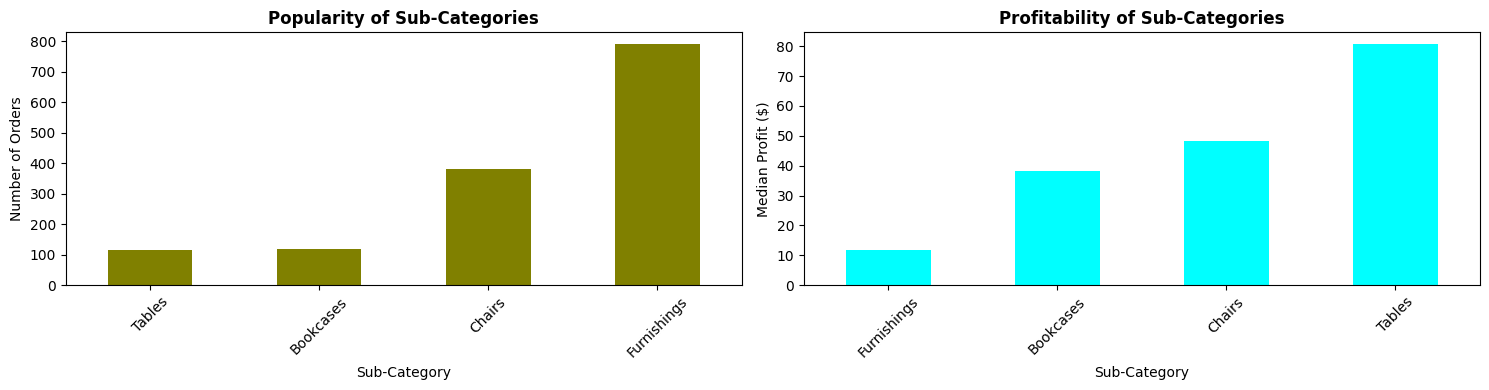

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))

#Make visualization for non-negative values of Sales
non_negative_profit.groupby("Sub-Category")["Sales"].count().sort_values().plot(kind="bar", ax=ax[0], color="olive")
ax[0].set_title("Popularity of Sub-Categories", fontweight="semibold")
ax[0].set_xlabel("Sub-Category")
ax[0].set_ylabel("Number of Orders")
ax[0].tick_params(axis='x', rotation=45)

#Make visualization for non-negative values of Profit
non_negative_profit.groupby("Sub-Category")["Profit"].median().sort_values().plot(kind="bar", ax=ax[1], color="cyan")
ax[1].set_title("Profitability of Sub-Categories", fontweight="semibold")
ax[1].set_xlabel("Sub-Category")
ax[1].set_ylabel("Median Profit ($)")
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

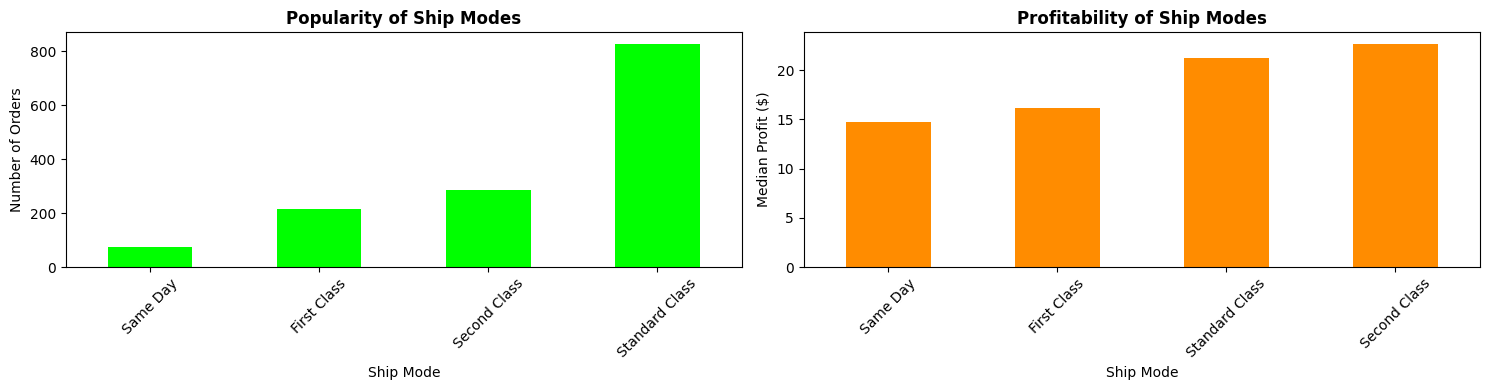

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))

#Make visualization for non-negative values of Sales
non_negative_profit.groupby("Ship Mode")["Sales"].count().sort_values().plot(kind="bar", ax=ax[0], color="lime")
ax[0].set_title("Popularity of Ship Modes", fontweight="semibold")
ax[0].set_xlabel("Ship Mode")
ax[0].set_ylabel("Number of Orders")
ax[0].tick_params(axis='x', rotation=45)

#Make visualization for non-negative values of Profit
non_negative_profit.groupby("Ship Mode")["Profit"].median().sort_values().plot(kind="bar", ax=ax[1], color="darkorange")
ax[1].set_title("Profitability of Ship Modes", fontweight="semibold")
ax[1].set_xlabel("Ship Mode")
ax[1].set_ylabel("Median Profit ($)")
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

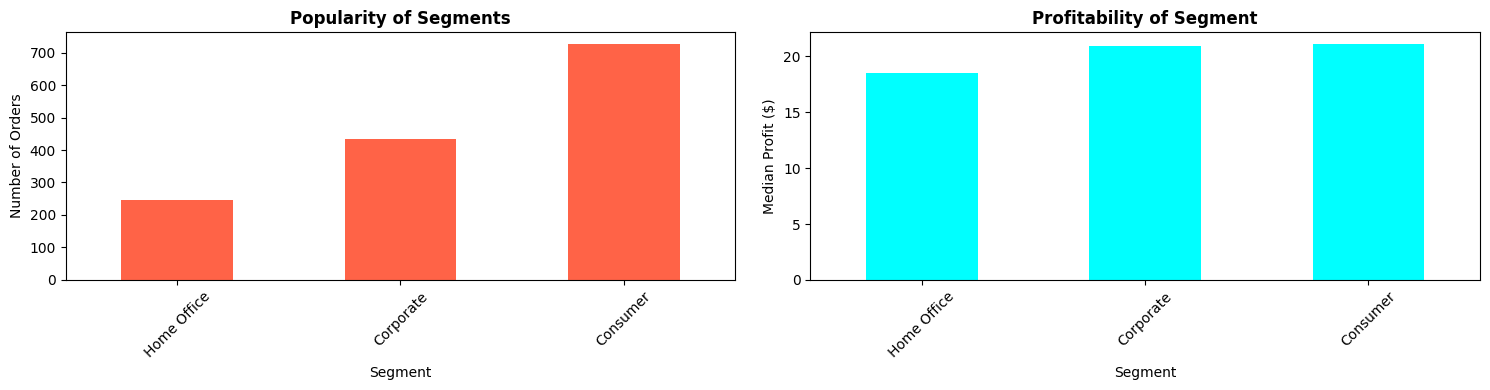

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))

#Make visualization for non-negative values of Sales
non_negative_profit.groupby("Segment")["Sales"].count().sort_values().plot(kind="bar", ax=ax[0], color="tomato")
ax[0].set_title("Popularity of Segments", fontweight="semibold")
ax[0].set_xlabel("Segment")
ax[0].set_ylabel("Number of Orders")
ax[0].tick_params(axis='x', rotation=45)

#Make visualization for non-negative values of Profit
non_negative_profit.groupby("Segment")["Profit"].median().sort_values().plot(kind="bar", ax=ax[1], color="aqua")
ax[1].set_title("Profitability of Segment", fontweight="semibold")
ax[1].set_xlabel("Segment")
ax[1].set_ylabel("Median Profit ($)")
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

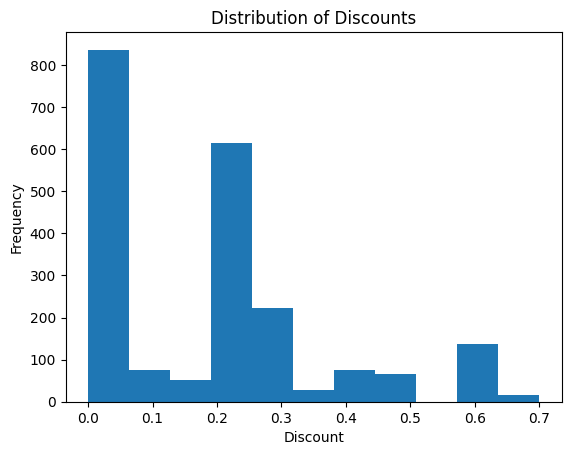

In [ ]:
plt.hist(furniture_data["Discount"], bins=11)
plt.title("Distribution of Discounts")
plt.xlabel("Discount")
plt.ylabel("Frequency")
plt.show()

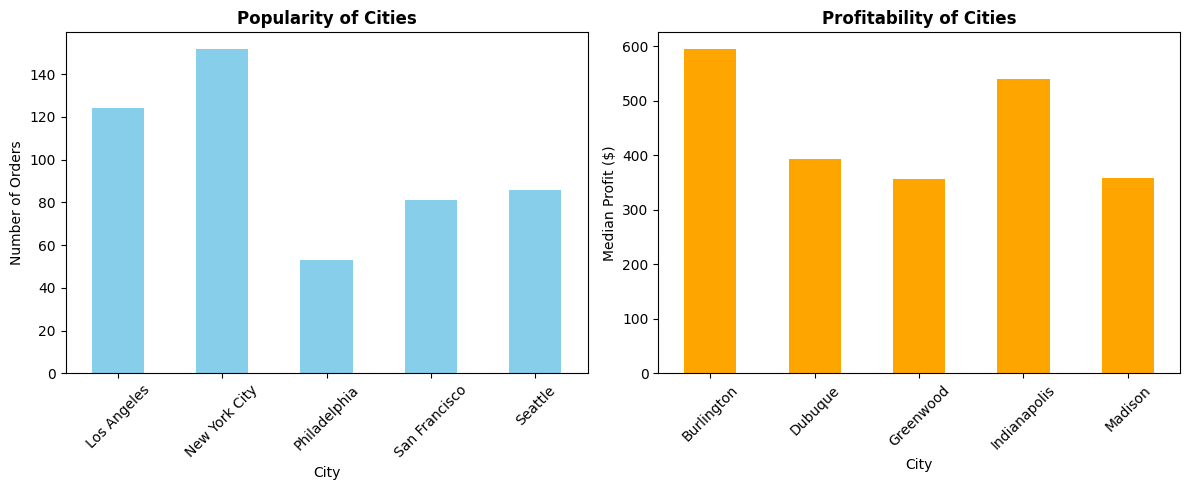

In [ ]:
# Create figure and subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Make visualization for non-negative values of Sales across top 5 cities
top_sales_cities = non_negative_profit.groupby("City")["Sales"].count().nlargest(5)
top_sales_cities.sort_index().plot(kind="bar", ax=ax[0], color="skyblue")

ax[0].set_title("Popularity of Cities", fontweight="semibold")
ax[0].set_xlabel("City")
ax[0].set_ylabel("Number of Orders")
ax[0].tick_params(axis='x', rotation=45)

# Make visualization for non-negative values of Profit across top 5 cities
top_profit_cities = non_negative_profit.groupby("City")["Profit"].median().nlargest(5)
top_profit_cities.sort_index().plot(kind="bar", ax=ax[1], color="orange")

ax[1].set_title("Profitability of Cities", fontweight="semibold")
ax[1].set_xlabel("City")
ax[1].set_ylabel("Median Profit ($)")
ax[1].tick_params(axis='x', rotation=45)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

##**Shipping Time**

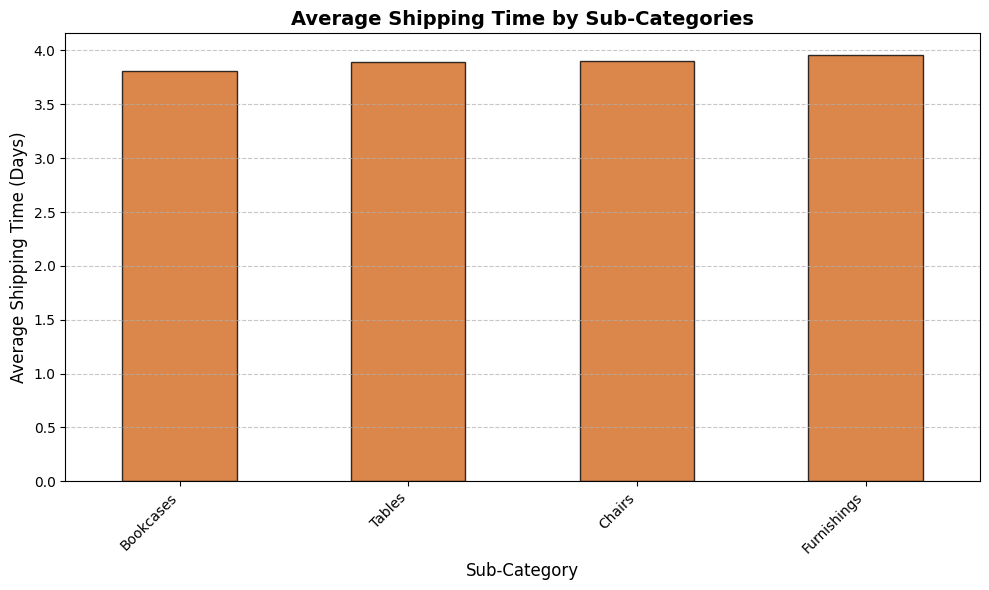

In [ ]:
#Calculating shipping time and sorting by sub-categories
furniture_data["Shipping Time"] = (furniture_data["Ship Date"] - furniture_data["Order Date"]).dt.days
avg_shipping_time_by_subcategories = furniture_data.groupby("Sub-Category")["Shipping Time"].mean().sort_values()

#Visualizing distribution between subcategories and average shipping time
plt.figure(figsize=(10, 6))
avg_shipping_time_by_subcategories.plot(kind="bar", color="chocolate", edgecolor="black", alpha=0.8)
plt.title("Average Shipping Time by Sub-Categories", fontsize=14, fontweight="semibold")
plt.xlabel("Sub-Category", fontsize=12)
plt.ylabel("Average Shipping Time (Days)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

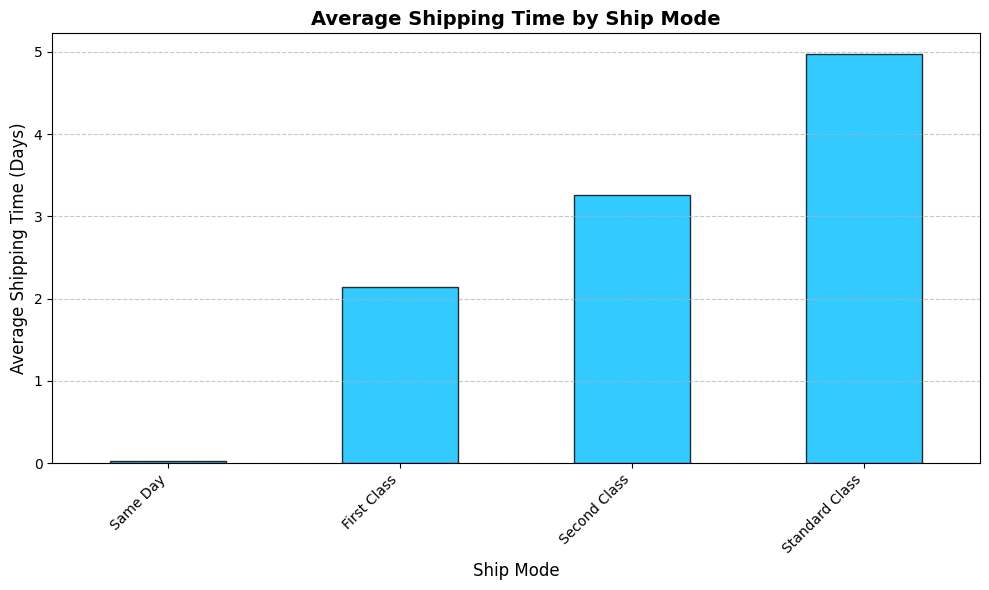

In [ ]:
#Sorting ship mode by average shipping time
avg_shipping_time_by_shipmode = furniture_data.groupby("Ship Mode")["Shipping Time"].mean().sort_values()

#Visualizing distribution between ship mode and average shipping time
plt.figure(figsize=(10, 6))
avg_shipping_time_by_shipmode.plot(kind="bar", color="deepskyblue", edgecolor="black", alpha=0.8)
plt.title("Average Shipping Time by Ship Mode", fontsize=14, fontweight="semibold")
plt.xlabel("Ship Mode", fontsize=12)
plt.ylabel("Average Shipping Time (Days)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

<ipython-input-19-e206bda68b98>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_shipping_time_by_profit_range = furniture_data.groupby("Profit Range")["Shipping Time"].mean()


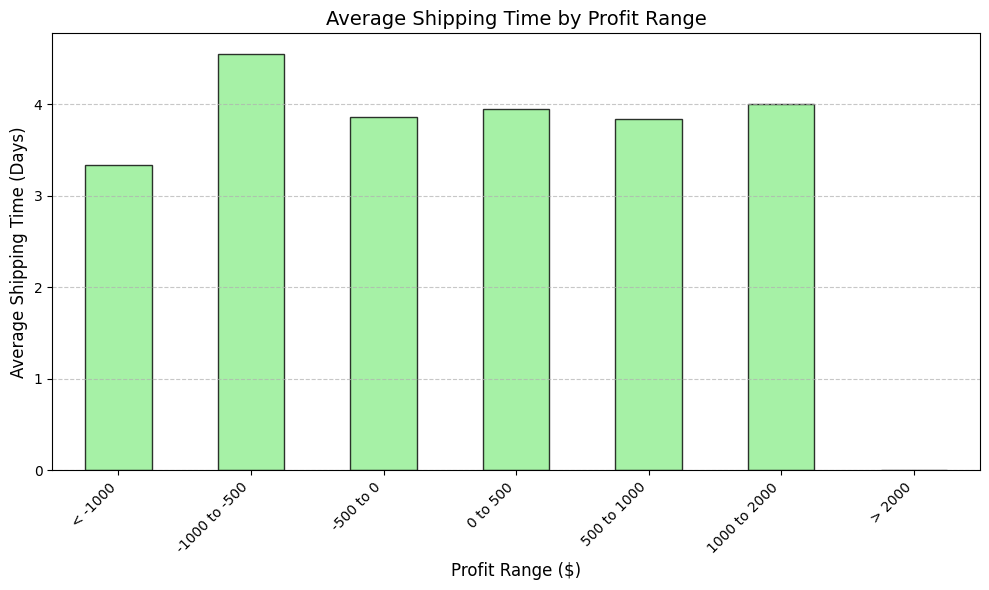

In [ ]:
bins = [-np.inf, -1000, -500, 0, 500, 1000, 2000, np.inf]
labels = ["< -1000", "-1000 to -500", "-500 to 0", "0 to 500", "500 to 1000", "1000 to 2000", "> 2000"]
furniture_data["Profit Range"] = pd.cut(furniture_data["Profit"], bins=bins, labels=labels)

avg_shipping_time_by_profit_range = furniture_data.groupby("Profit Range")["Shipping Time"].mean()

plt.figure(figsize=(10, 6))
avg_shipping_time_by_profit_range.plot(kind="bar", color="lightgreen", edgecolor="black", alpha=0.8)
plt.title("Average Shipping Time by Profit Range", fontsize=14)
plt.xlabel("Profit Range ($)", fontsize=12)
plt.ylabel("Average Shipping Time (Days)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

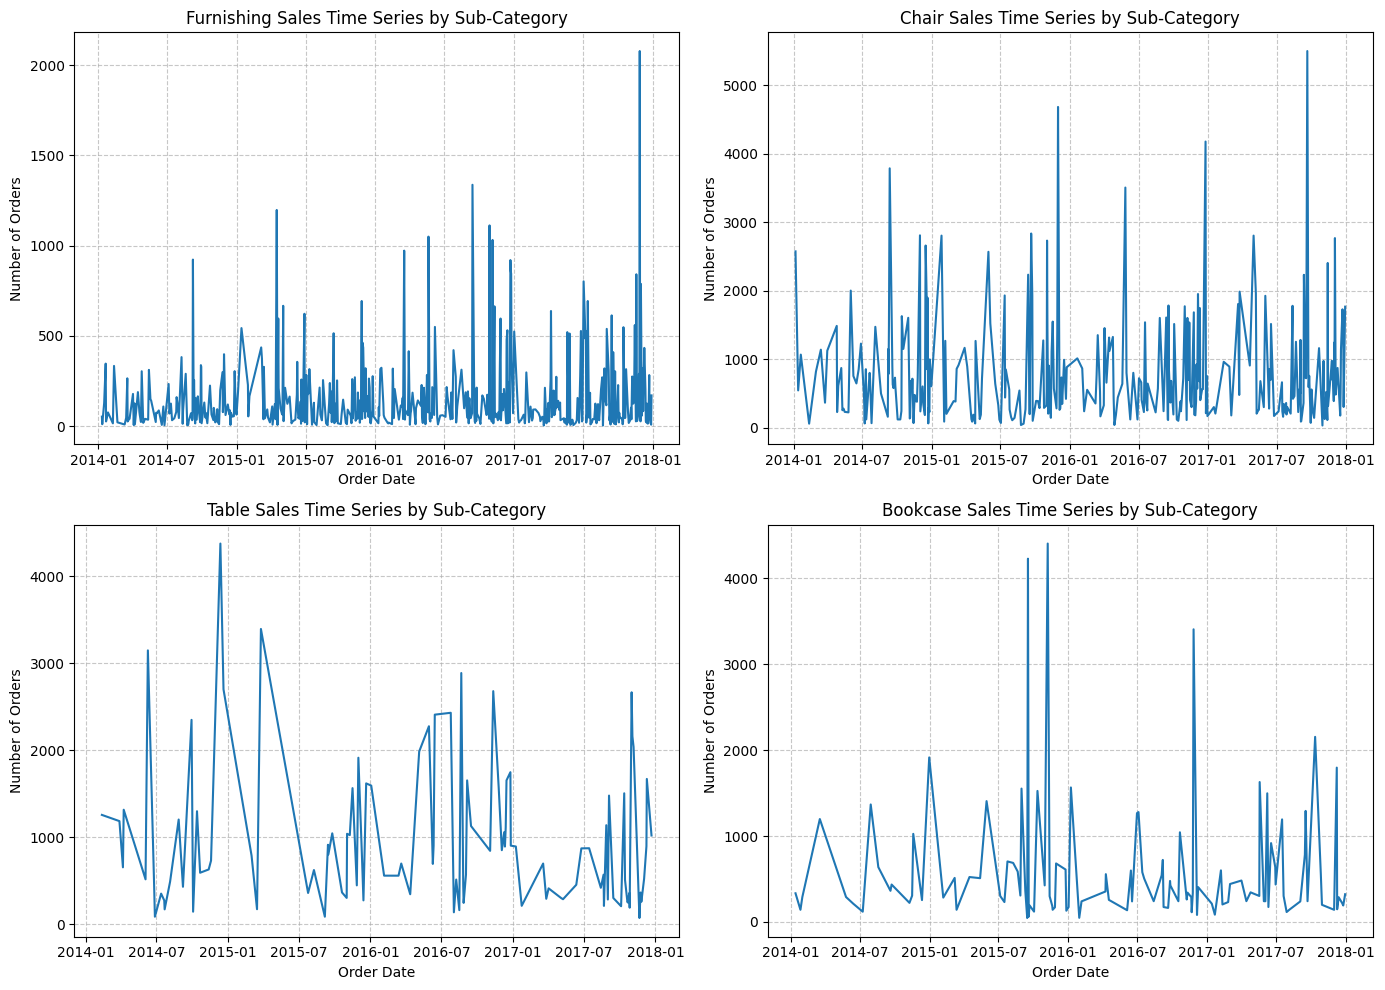

In [ ]:
category_by_sales = non_negative_profit.groupby("Sub-Category")["Sales"].count()

time_series_data = non_negative_profit[non_negative_profit["Sub-Category"].isin(category_by_sales.index)]
time_series_data = time_series_data.groupby(["Sub-Category", "Order Date"])["Sales"].sum().reset_index()
time_series_data["Order Date"] = pd.to_datetime(time_series_data["Order Date"])

fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Furnishings
sns.lineplot(
    data=time_series_data[time_series_data["Sub-Category"] == "Furnishings"],
    x="Order Date",
    y="Sales",
    ax=ax[0, 0]
)
ax[0, 0].set_title("Furnishing Sales Time Series by Sub-Category")
ax[0, 0].set_xlabel("Order Date")
ax[0, 0].set_ylabel("Number of Orders")
ax[0, 0].grid(True, linestyle="--", alpha=0.7)

# Chairs
sns.lineplot(
    data=time_series_data[time_series_data["Sub-Category"] == "Chairs"],
    x="Order Date",
    y="Sales",
    ax=ax[0, 1]
)
ax[0, 1].set_title("Chair Sales Time Series by Sub-Category")
ax[0, 1].set_xlabel("Order Date")
ax[0, 1].set_ylabel("Number of Orders")
ax[0, 1].grid(True, linestyle="--", alpha=0.7)

# Tables
sns.lineplot(
    data=time_series_data[time_series_data["Sub-Category"] == "Tables"],
    x="Order Date",
    y="Sales",
    ax=ax[1, 0]
)
ax[1, 0].set_title("Table Sales Time Series by Sub-Category")
ax[1, 0].set_xlabel("Order Date")
ax[1, 0].set_ylabel("Number of Orders")
ax[1, 0].grid(True, linestyle="--", alpha=0.7)

# Bookcases
sns.lineplot(
    data=time_series_data[time_series_data["Sub-Category"] == "Bookcases"],
    x="Order Date",
    y="Sales",
    ax=ax[1, 1]
)
ax[1, 1].set_title("Bookcase Sales Time Series by Sub-Category")
ax[1, 1].set_xlabel("Order Date")
ax[1, 1].set_ylabel("Number of Orders")
ax[1, 1].grid(True, linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

##**Finding out what negative values in Profit column correlate with**

In [ ]:
negative_profit = furniture_data[furniture_data["Profit"] < 0]
total_loss = negative_profit["Profit"].sum()
print(f"Losses for Furniture Store: ${total_loss}")

Losses for Furniture Store: $-60936.109


As the *total loss* equals to **$60936.109**, it is of high importance to define dependencies between the sector of Profit with negative values and the other variables in the furniture dataset.

###*Sub-Category*

In [ ]:
#Create a subdataset for negative values in Profit
negative_profit = furniture_data[furniture_data["Profit"] < 0]

#Distribute Sub-Categories among Profit
groups = [negative_profit[negative_profit['Sub-Category'] == cat]['Profit'] for cat in negative_profit['Sub-Category'].unique()]
f_stat, p_value = stats.f_oneway(*groups)

#Calculate f-statistic and p-value
print(f"F-statistic: {f_stat} \nP-value: {p_value}")
if p_value > 0.05:
  print("P-value is not statistically significant.")
else: print("P-values is statistically significant.")

F-statistic: 32.57674869670599 
P-value: 9.793445228655088e-20
P-values is statistically significant.


The result is statistically significant and f-statistic is high meaning that it deserves to be visualized.

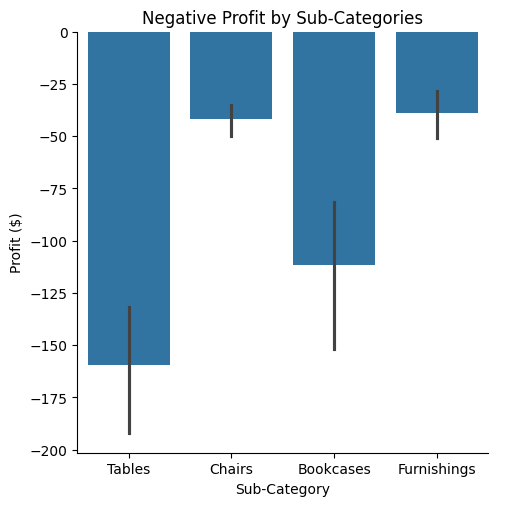

In [ ]:
#Create catplot for discovering what subcategories brought the highest negative values
sns.catplot(x="Sub-Category", y="Profit", kind="bar", data=negative_profit)
plt.title("Negative Profit by Sub-Categories")
plt.xlabel("Sub-Category")
plt.ylabel("Profit ($)")
plt.show()

###*Sales*

In [ ]:
#Conduct distribution test for Profit and Sales values
from scipy.stats import normaltest
_,p_value_normaltest_profit = normaltest(negative_profit["Profit"])
_,p_value_normaltest_sales = normaltest(negative_profit["Sales"])

print(f"Normal test for Profit: {p_value_normaltest_profit}")
print(f"Normal test for Sales: {p_value_normaltest_sales}")

Normal test for Profit: 3.939248162553989e-178
Normal test for Sales: 2.21268390743913e-142


In [ ]:
from scipy import stats

# Filter for negative profit only and reset index
negative_profit = furniture_data[furniture_data["Profit"] < 0].reset_index(drop=True)

# Calculate Z-scores
z_scores_profit = stats.zscore(negative_profit["Profit"])
z_scores_sales = stats.zscore(negative_profit["Sales"])

# Identify outliers (Z-score > 3 or < -3)
outliers_profit = negative_profit["Profit"][abs(z_scores_profit) > 3].tolist()
outliers_sales = negative_profit["Sales"][abs(z_scores_sales) > 3].tolist()

# Print outlier information
print(f"Outliers in Profit: {outliers_profit}")
print(f"Outliers in Sales: {outliers_sales}")

Outliers in Profit: [-1665.0522, -814.4832, -619.596, -786.744, -566.5625, -553.6476, -653.2834, -1002.7836, -734.5264, -630.882, -968.8833, -1862.3124]
Outliers in Sales: [3083.43, 1740.06, 2396.2656, 2065.32, 2453.43, 2003.52, 1781.682, 2314.116, 2003.92, 4007.84, 4416.174, 1875.258, 4297.644]


In [ ]:
#Find out Kendall's Tau for Profit and Sales values
from scipy.stats import kendalltau
kendall_corr = negative_profit["Profit"].corr(negative_profit["Sales"], method="kendall")
print(f"Kendall's Tau: {kendall_corr}")

Kendall's Tau: -0.4304852201458343


The correlation is negative and weak so that it is out of interest.

###*Discounts*

In [ ]:
#Distribution test for Discount values
_,p_value_normaltest_discount = normaltest(negative_profit["Discount"])
if p_value_normaltest_discount > 0.05:
  print("The distribution is normal.")
else: print("The distribution is not normal.")

#Finding out outliers
z_scores_discount = stats.zscore(negative_profit["Discount"])
outliers_discount = negative_profit["Discount"][abs(z_scores_discount) > 3].tolist()
print(f"Outliers in Discounts: {outliers_discount}")

The distribution is not normal.
Outliers in Discounts: []


As there are no outliers and the distribution is abnormal, Spearman Rank is selected.

In [ ]:
from scipy.stats import spearmanr
spearman_corr = negative_profit["Profit"].corr(negative_profit["Discount"], method="spearman")
print(f"Spearman Rank for Discount: {spearman_corr}")

Spearman Rank for Discount: -0.19580206570363023


###*Cities*

In [ ]:
#Calculate correlation between cities and profit
cities = [negative_profit[negative_profit['City'] == cit]['Profit'] for cit in negative_profit['City'].unique()]
f_stat, p_value = stats.f_oneway(*cities)

print(f"F-statistic: {f_stat} \nP-value: {p_value}")
if p_value > 0.05:
  print("P-value is not statistically significant.")
else: print("P-values is statistically significant.")

F-statistic: 1.404781798205191 
P-value: 0.002311975405269204
P-values is statistically significant.


Correlation is not high but significant, so that this dependency deserves visualization.

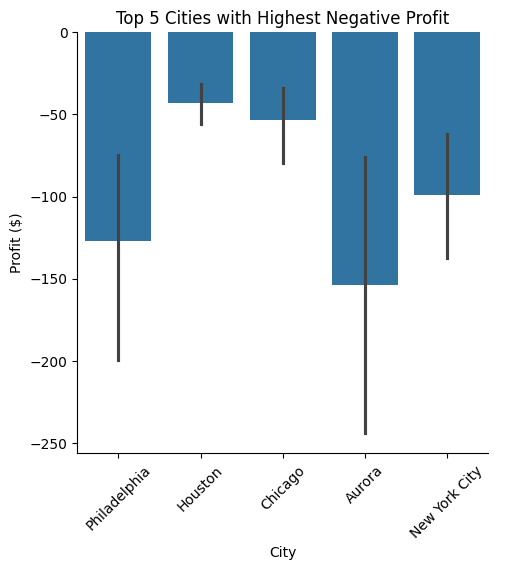

In [ ]:
# Aggregate total negative profit per city
top_cities = negative_profit.groupby("City")["Profit"].sum().nsmallest(5).index

# Filter dataset for only these top 5 cities
filtered_data = negative_profit[negative_profit["City"].isin(top_cities)]

# Plot
sns.catplot(x="City", y="Profit", kind="bar", data=filtered_data)
plt.title("Top 5 Cities with Highest Negative Profit")
plt.xlabel("City")
plt.ylabel("Profit ($)")
plt.xticks(rotation=45)  # Rotate for better readability
plt.show()


###*Ship Mode*

In [ ]:
#Calculate correlation between ship mode and profit
ship_mode = [negative_profit[negative_profit['Ship Mode'] == sm]['Profit'] for sm in negative_profit['Ship Mode'].unique()]
f_stat, p_value = stats.f_oneway(*ship_mode)

print(f"F-statistic: {f_stat} \nP-value: {p_value}")
if p_value > 0.05:
  print("P-value is not statistically significant.")
else: print("P-values is statistically significant.")

F-statistic: 0.49410592874436504 
P-value: 0.6864738332124836
P-value is not statistically significant.


As p-value is insignificant, the correlation is not taken into consideration.

###*Shipping Time*

In [ ]:
#Distribution test for shipping time
_,p_value_normaltest_ship_time = normaltest(shipping_time)
if p_value_normaltest_ship_time > 0.05:
  print("The distribution is normal.")
else: print("The distribution is not normal.")

#Discovering outliers in shipping time
z_scores_ship_time = stats.zscore(shipping_time)
outliers_ship_time = shipping_time[abs(z_scores_ship_time) > 3].tolist()
print(f"Outliers in Shipping Time: {outliers_ship_time}")

The distribution is not normal.
Outliers in Shipping Time: []


In [ ]:
spearman_corr = negative_profit["Profit"].corr(shipping_time, method="spearman")
print(f"Spearman Rank for Shipping Time: {spearman_corr}")

Spearman Rank for Shipping Time: 0.009277662338202593


The result is considerably weak meaning that the impact of shipping time on negative profits can be neglected. However, as correlation is not null, let's have a look at relplot for shipping time and negative profit.

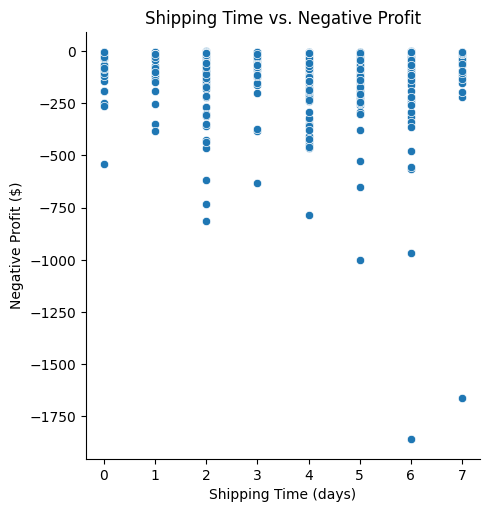

In [ ]:
sns.relplot(x=shipping_time, y="Profit", data=negative_profit)
plt.title("Shipping Time vs. Negative Profit")
plt.xlabel("Shipping Time (days)")
plt.ylabel("Negative Profit ($)")
plt.show()

###*Segment*

In [ ]:
#Finding out correlation between segment and profit
segments = [negative_profit[negative_profit['Segment'] == seg]['Profit'] for seg in negative_profit['Segment'].unique()]
f_stat, p_value = stats.f_oneway(*segments)

print(f"F-statistic: {f_stat} \nP-value: {p_value}")
if p_value > 0.05:
  print("P-value is not statistically significant.")
else: print("P-values is statistically significant.")

F-statistic: 0.0713551388223448 
P-value: 0.9311378196538865
P-value is not statistically significant.


The result is not significant so that it can be omitted.

###*Quantity*

In [ ]:
#Distribution test for quantity
_,p_value_normaltest_quantity = normaltest(negative_profit["Quantity"])
if p_value_normaltest_quantity > 0.05:
  print("The distribution is normal.")
else: print("The distribution is not normal.")

#Finding out outliers in Quantity
z_scores_quantity = stats.zscore(negative_profit["Quantity"])
outliers_quantity = negative_profit["Quantity"][abs(z_scores_quantity) > 3].tolist()
print(f"Outliers in Quantity: {outliers_quantity}")

The distribution is not normal.
Outliers in Quantity: [10, 12, 14, 10, 10, 10, 10, 13]


As there are outliers that can impact on correlation test, Kendall's Tau is used for it is resilient to anomalies.

In [ ]:
kendall_corr_quantity = negative_profit["Profit"].corr(negative_profit["Quantity"], method="kendall")
print(f"Kendall's Tau for Quantity: {kendall_corr_quantity}")

Kendall's Tau for Quantity: -0.2679803641888331


The correlation is negative meaning that we cross it out of our circles of interest.

#**Conclusions**

Customers placed a total of 2,121 orders, earning 79,387 dollars (excluding losses) but losing 60,936 dollars for unspecified reasons. On average, orders were delivered in 3.92 days.

The analysis of sub-categories presents conflicting results regarding popularity, profitability, and losses. **Furnishings** is the most frequently ordered sub-category, while **Tables** generate the highest profit—but also the highest losses, with a strong statistically significant correlation. The disparity between popularity and profitability likely stems from pricing differences; despite high order volume, **Furnishings** yield minimal profit due to lower prices. The paradox of **Tables** being both the most profitable and the biggest source of losses may be attributed to product quality issues or situational factors.

Shipping modes also show a misalignment between preference and profitability. **Standard Class** is the most commonly chosen option, yet **Second Class** generates the highest profit. However, negative profit does not appear to be significantly correlated with shipping modes, as the statistical test fails to pass the p-threshold.

Customer segmentation provides clearer insights. **Consumers** make up the largest customer group and contribute the most profit, while their correlation with negative profit is not statistically significant.

Discount analysis reveals that most products are sold at full price, with extreme discounts (60–70%) being rare. There is a negative correlation between discounts and negative profit.

Geographically, **New York City** has the highest order volume, while **Burlington** is the most profitable. However, cities with high order volume and profitability contrast sharply with those experiencing the greatest losses. **Aurora** and **Philadelphia** incur the highest losses, with a significant correlation (p = 0.002).

Shipping time analysis does not provide meaningful insights into the causes of negative profit, as its correlation with losses is negligible.

#**Recommendations**:
1. Monitor individual products within sub-categories to identify specific items driving losses, particularly in furniture.
2. Leverage geographical segmentation to pinpoint locations where the company is experiencing significant financial setbacks.

##**Annex**

The Tableau dashboard can be found [here](https://public.tableau.com/app/profile/danylo.zhyrko/viz/DataforNordicNest/DataforNordicNest?publish=yes).

**Dashboard Explications**:

1. Filters regulate the state of profit. You can see the three states by clicking check-in buttons:
- Actual profit = Perfect Profit (All) + Negative Profit (All)
- No losses = Perfect Profit (All) + Negative Profit (Null)
- Only losses = Perfect Profit (Null) + Negative Profit (All).

2. The *Cohort Analysis* table shows the percent of orders made repeatedly which allows to find out customers from which month made the second order.